<a id="Import"></a>
# <p style="font-family: 'Fira Sans'; font-size:200%">1| Libraries importing</p>

In [41]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')


<a id="Data-load"></a>
# <p style="font-family: 'Fira Sans'; font-size:200%">2| Importing Data</p>

In [42]:
df = pd.read_csv("loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
# Names have Annoying space, which we can remove
df = df.rename(columns=lambda x: x.replace(" ", ""))
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


The dataset does not have any missing values. 👍

In [5]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


The distribution of categorical data appears balanced, while variations in data scale differ. Given the limited number of columns, a pair plot could serve as an excellent initial exploration. 📊📈👌

In [6]:
df = df.drop(columns="loan_id")

<a id="EDA"></a>
# <p style="font-family: 'Fira Sans'; font-size:200%">3| EDA</p>

<a id="Numerical-EDA"></a>

# <p style="font-family: 'Fira Sans'; font-size:150%">3.1| Numerical Data ccorrelation</p>

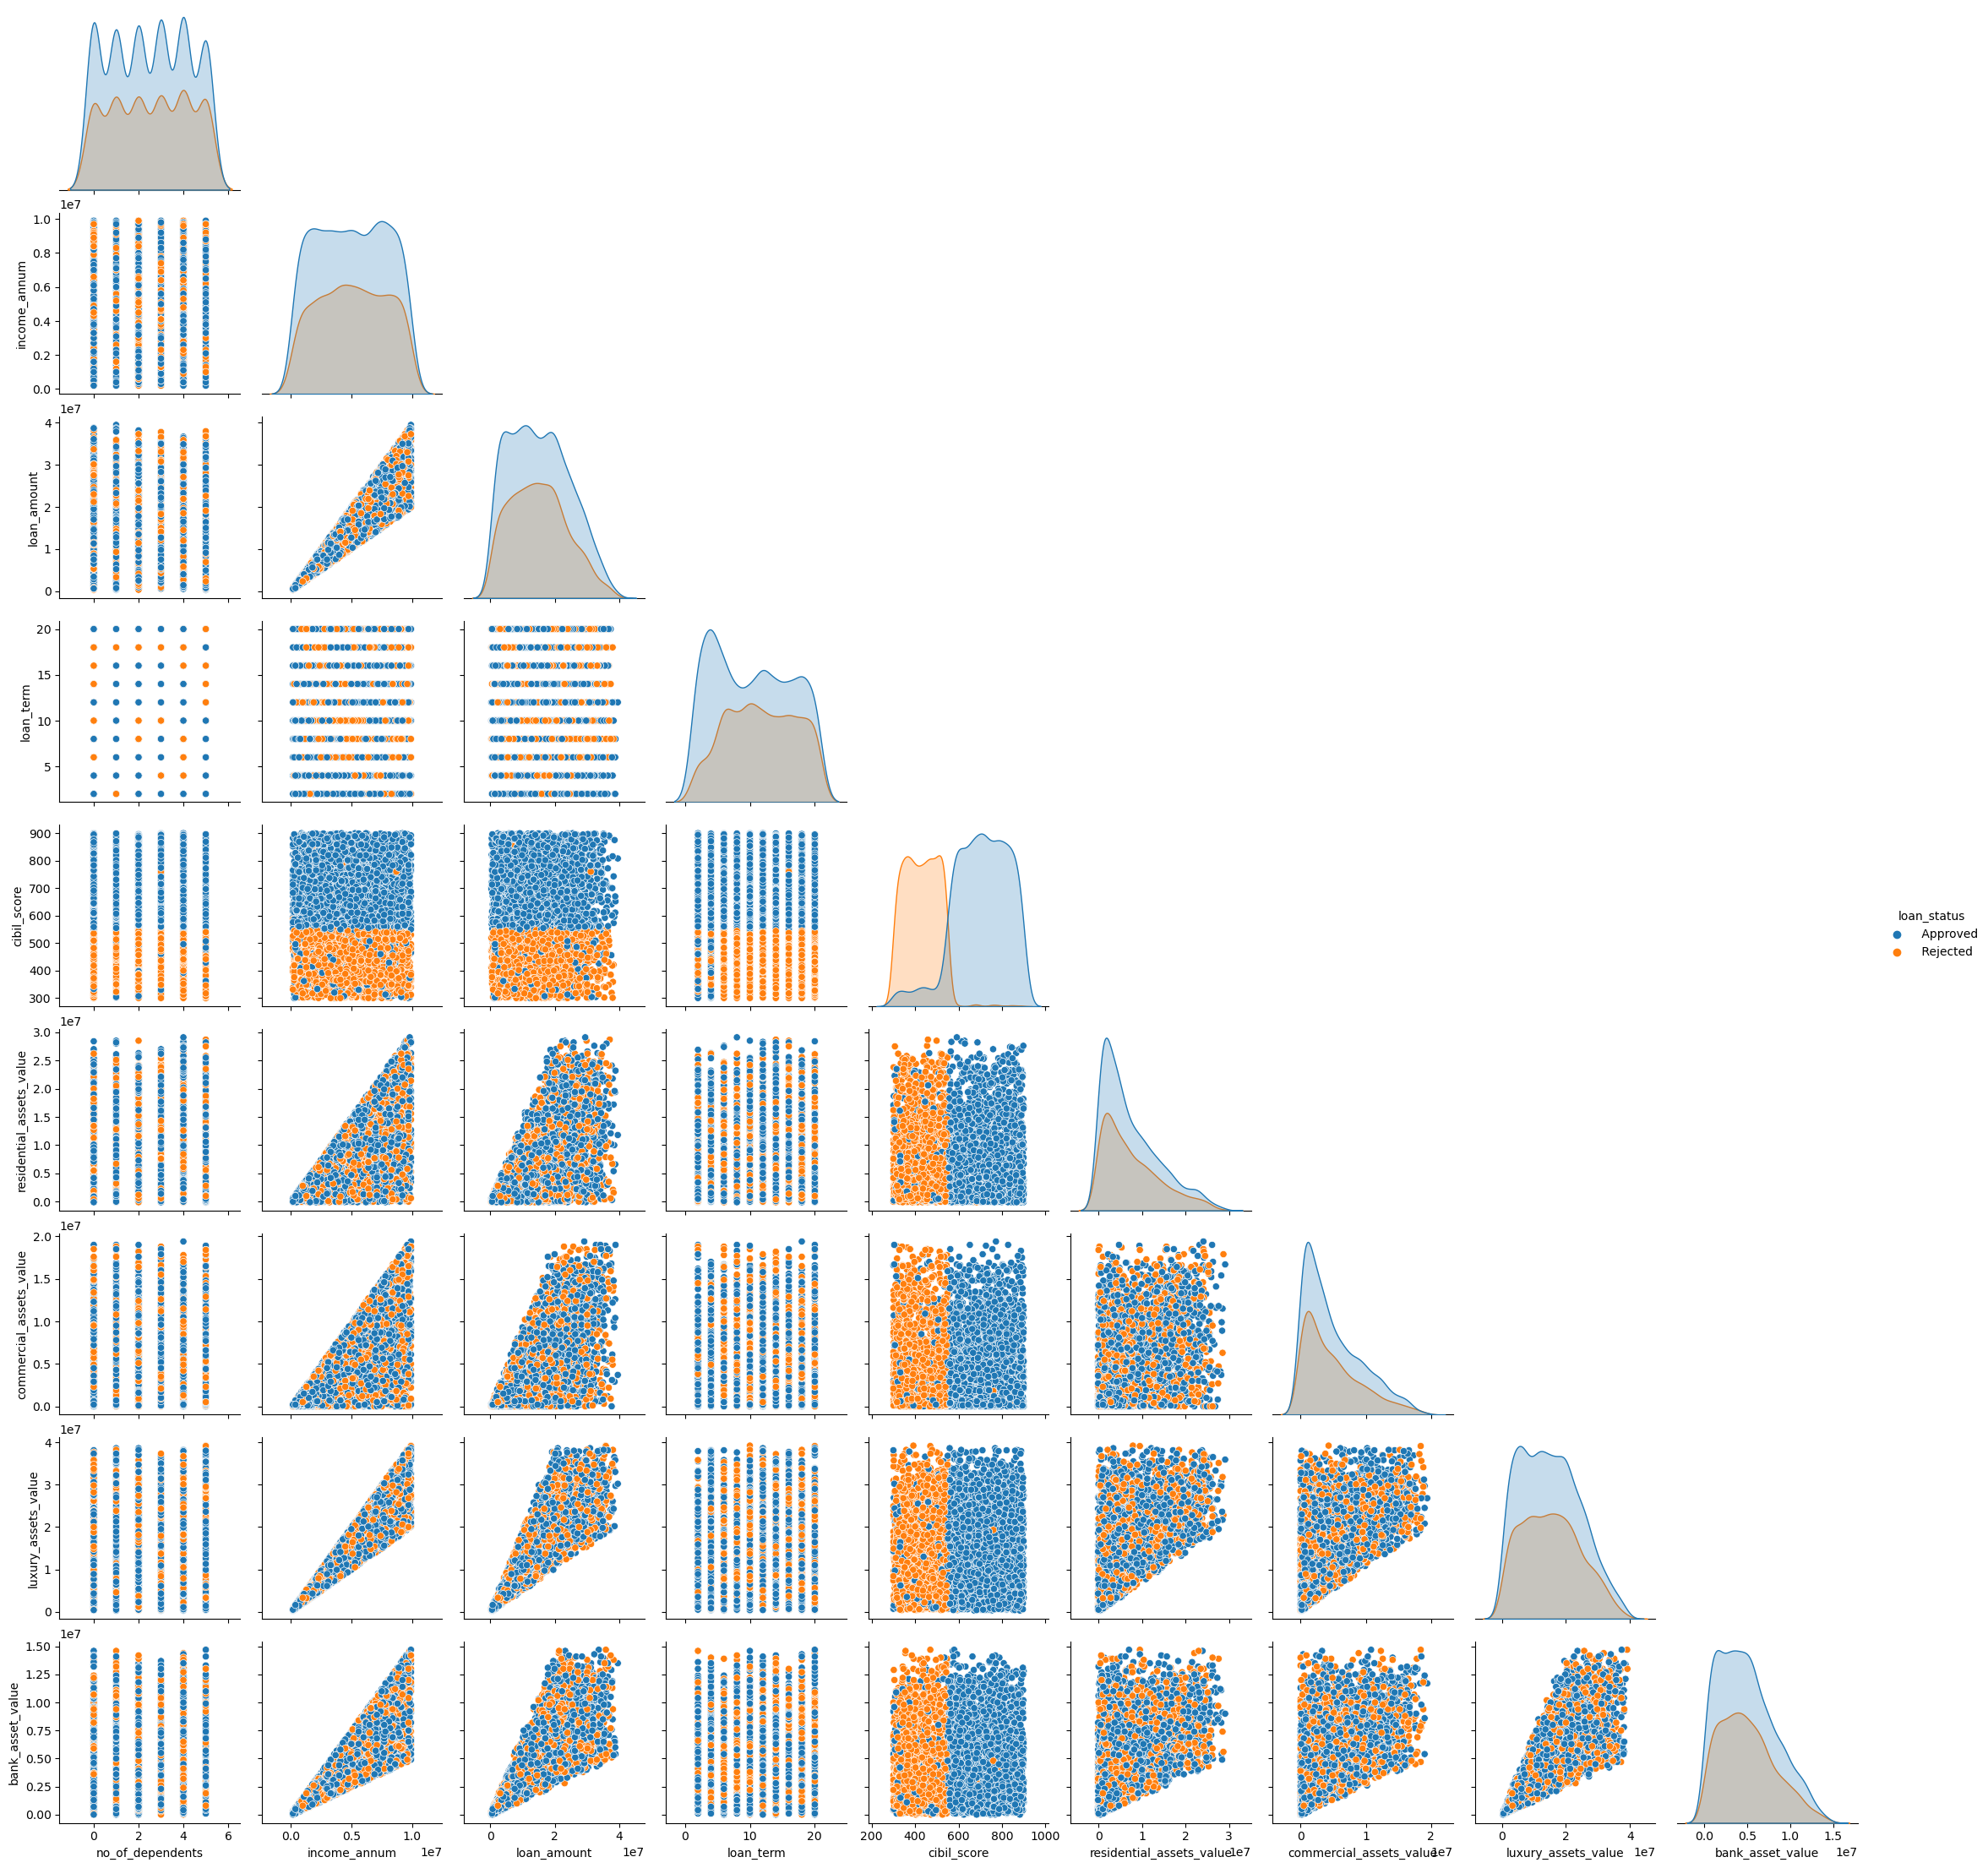

In [7]:
fig = sns.pairplot(df, hue="loan_status", diag_kind="kde", corner=True)
plt.show()

In [8]:
df.corr()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
no_of_dependents,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


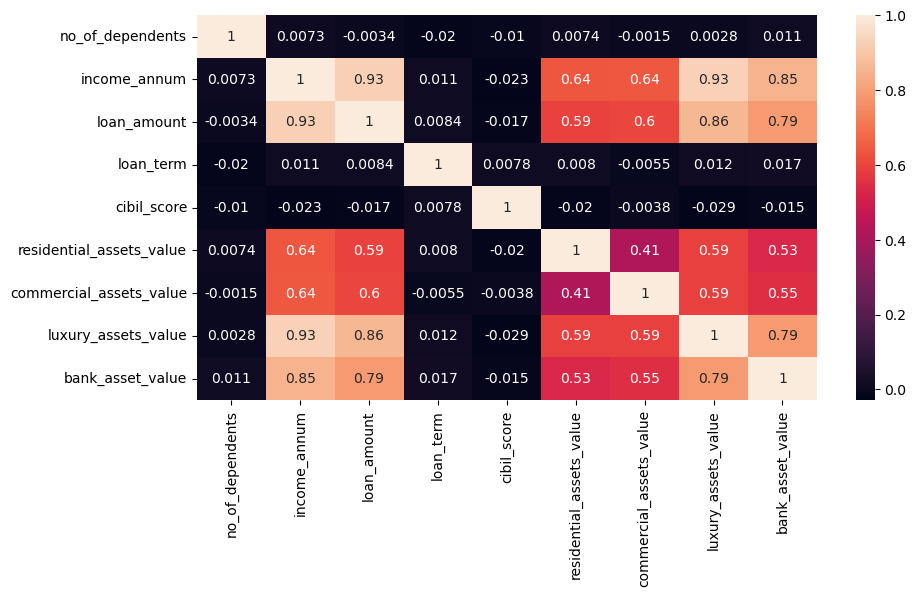

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)      #annot= True means to include vaue.
plt.show()

The charts reveal notable linear correlations between Income, Assets, and the Loan amount. Among these factors, Credit Score stands out as the most influential factor for financial institutions when determining loan approvals. A higher credit score is strongly associated with an increased likelihood of loan approval. 📈💰📊👍

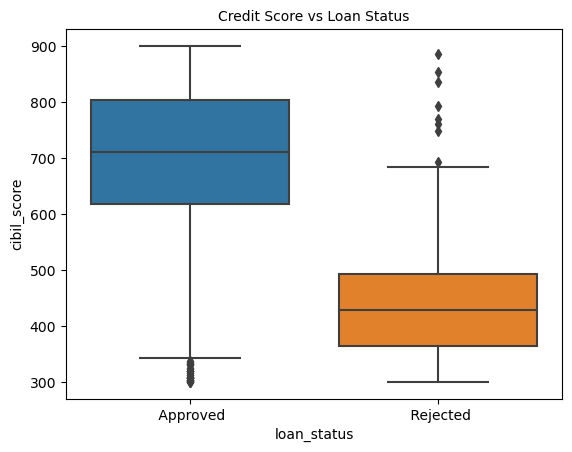

In [10]:
sns.boxplot(data=df, y="cibil_score", x="loan_status")
plt.title("Credit Score vs Loan Status", fontsize=10)
plt.show()

A straightforward strategy would be to approve all customers with a credit score of 500 or higher. 📝📈👍

<a id="Categorical-EDA"></a>
# <p style="font-family: 'Fira Sans'; font-size:150%">3.2| Categorical data likelihood</p>

`no_of_dependents` and `loan_term` can be visualized as categorical data as well

<Axes: xlabel='education', ylabel='count'>

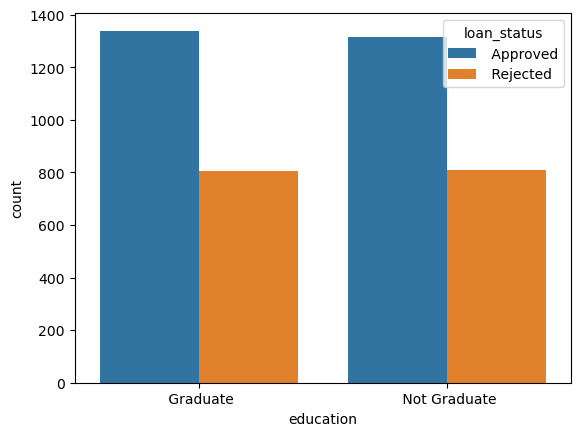

In [11]:
sns.countplot(x=df['education'], hue=df["loan_status"])

<Axes: xlabel='self_employed', ylabel='count'>

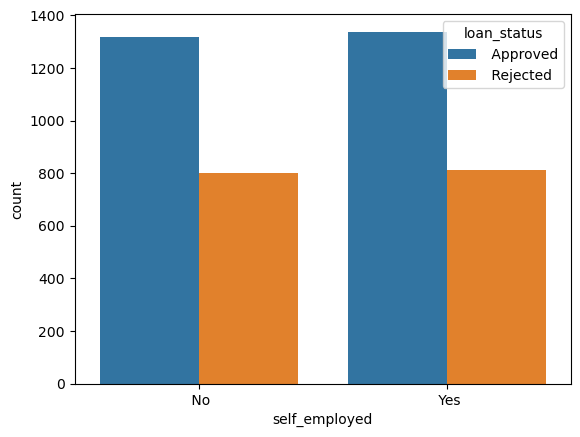

In [12]:
sns.countplot(x=df['self_employed'], hue=df["loan_status"])

<Axes: xlabel='loan_term', ylabel='count'>

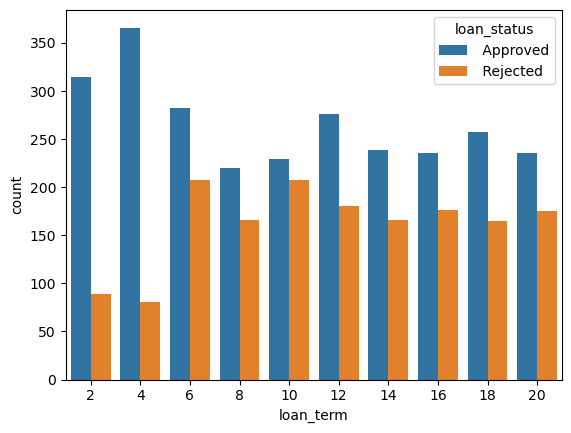

In [13]:
sns.countplot(x=df['loan_term'], hue=df["loan_status"])

<Axes: xlabel='no_of_dependents', ylabel='count'>

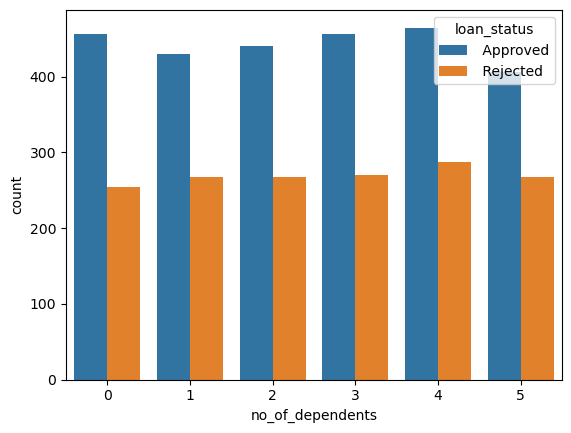

In [14]:
sns.countplot(x=df['no_of_dependents'], hue=df["loan_status"])

It appears that Short Term loans have a certain degree of favorability for the financial institute. However, other numerical parameters do not seem to provide sufficient information for making loan decisions. On the other hand, the distribution of other categorical features is relatively even across different loan statuses. 📊🏦🤝

<a id="Assets"></a>
# <p style="font-family: 'Fira Sans'; font-size:150%">4| Assets</p>

Instead of having individual features for each asset, consolidating them into a single feature could be a more efficient approach. 🏠🚗🏢📊


In [15]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


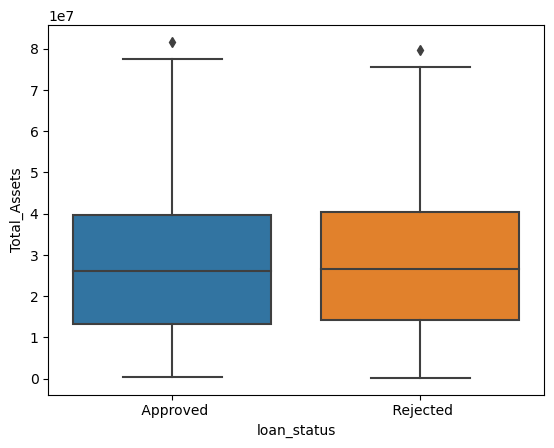

In [16]:
df["Total_Assets"] = df.filter(regex="assets").sum(axis=1)
sns.boxplot(data=df, y="Total_Assets", x="loan_status")
plt.show()

In [17]:
df["Total_Assets"]

0       42700000
1       13700000
2       44900000
3       44800000
4       50000000
          ...   
4264     6600000
4265    18100000
4266    31700000
4267    23000000
4268    65300000
Name: Total_Assets, Length: 4269, dtype: int64

Since indiviual assets are lineary correlated with each other and randomly distributed across the `loan status`, their sum also not be related with the `loan status`.

let us see the results of scaling the `Total Assets` value using `Scaled credit score`.

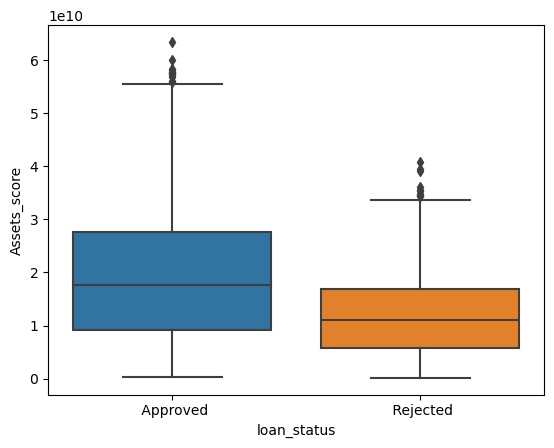

In [18]:
df["Assets_score"] = df["Total_Assets"] * df["cibil_score"]
sns.boxplot(data=df, y="Assets_score", x="loan_status")
plt.show()

The `Assets score` feature has some relation with the `loan status`, but this feature will tell the ability of an indiviual to get a loan regardless of the `loan amount`, which can't be true.

Let us divide the `Assets score` wwith the `loan amount` to get new feature.

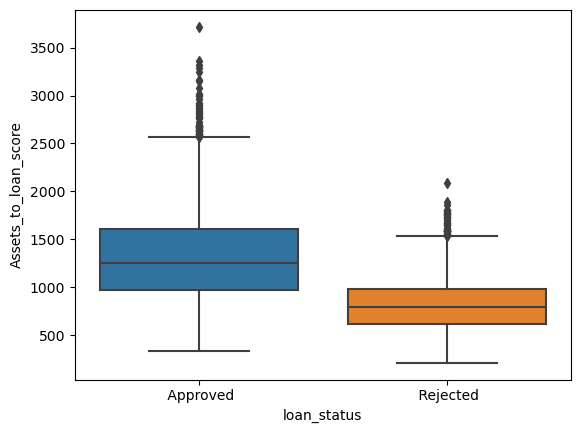

In [19]:
df["Assets_to_loan_score"] = df["Assets_score"] / df["loan_amount"]
sns.boxplot(data=df, y="Assets_to_loan_score", x="loan_status")
plt.show()

Indeed, `Assets to loan score` is better than the `Assets score` and other `assets` features.

<a id="Income"></a>
# <p style="font-family: 'Fira Sans'; font-size:150%">5| Income</p>

Financial institution might look at the `Annual income` and combare it to the `loan amount` and `loan term` in order to see if you are eligable for getting the loan.

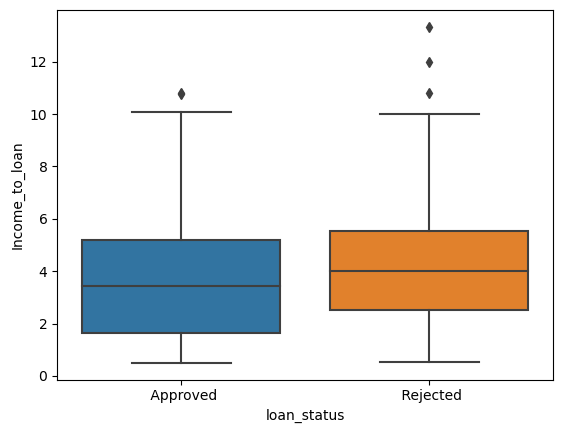

In [20]:
df["Income_to_loan"] = (df["income_annum"] * df["loan_term"]) / df["loan_amount"]
sns.boxplot(data=df, y="Income_to_loan", x="loan_status")
plt.show()

There is a slight difference between the categories, but we know for sure financial institutes will include the `Credit Score`

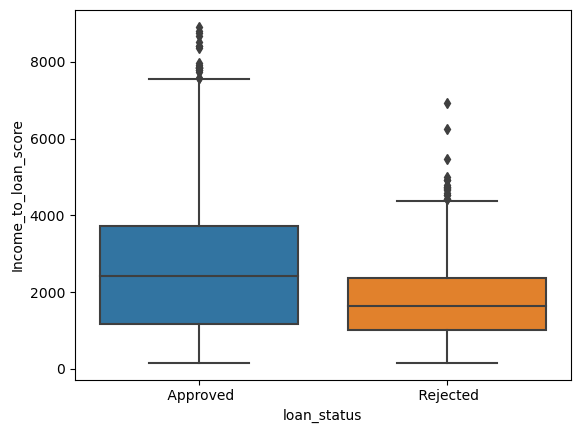

In [21]:
df["Income_to_loan_score"] = df["Income_to_loan"] * df["cibil_score"]
sns.boxplot(data=df, y="Income_to_loan_score", x="loan_status")
plt.show()

This looks better.

One last factor to include when loooking to the annual income, is to see how many people use this income, in order to estimate the expenses

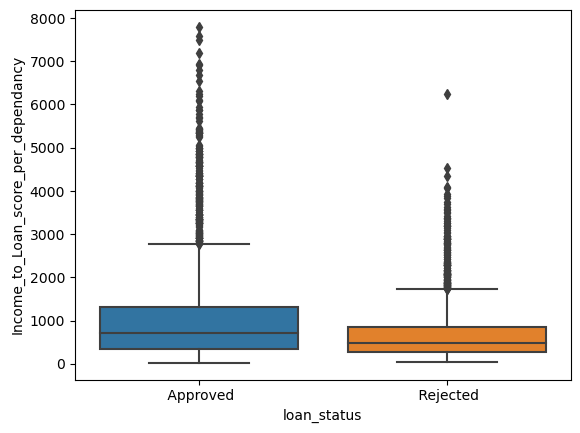

In [22]:
df["Income_to_Loan_score_per_dependancy"] = df["Income_to_loan_score"] / (
    df["no_of_dependents"] + 1
)

sns.boxplot(data=df, y="Income_to_Loan_score_per_dependancy", x="loan_status")
plt.show()

Three numerical features will be used for estimating the `loan status`:
<ol>
<li>cibil_score</li>
<li>Assets to loan score</li>
<li>Income to Loan score per dependancy</li>
</ol>

<a id="Model"></a>
# <p style="font-family: 'Fira Sans'; font-size:200%">6| Trainig Models</p>

In [23]:
ordinal_map = {' Approved': 1, ' Rejected': 0}
df['loan_status'] = df['loan_status'].replace(ordinal_map)

In [24]:
df.to_csv('cleaned1_loan.csv')

In [25]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 0)

In [26]:
X_train = df_train[["cibil_score", "Assets_to_loan_score", "Income_to_Loan_score_per_dependancy"]]
y_train = df_train["loan_status"]
X_test  = df_test[["cibil_score", "Assets_to_loan_score", "Income_to_Loan_score_per_dependancy"]]
y_test = df_test["loan_status"]

In [27]:
# Checking length
total_len = (len(X_train))
print("All total length = ",total_len)    # total row
print("X_train length and Y_train length = ", len(X_train),len(y_train))   #total train dataset length
print("X_test length = ", len(X_test))  # total test dataset length

All total length =  3415
X_train length and Y_train length =  3415 3415
X_test length =  854


In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()    #model
model.fit(X_train,y_train)

LogisticRegression()

In [29]:
predict_target = model.predict(X_test)    
predict_target

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

,cibil_score,Assets_to_loan_score,Income_to_Loan_score_per_dependancy
1972,673,2193.903955,1577.937853
528,559,799.907950,224.535565
3540,551,802.088608,1102.000000
87,402,879.286219,494.332155
1621,362,601.012821,334.153846
...,...,...,...
1505,433,782.051020,58.543367
2423,436,736.596273,386.713043
489,492,1514.071429,3514.285714
2653,799,1401.063380,1485.464789


In [30]:
for i in range(len(X_test)):
    print("Predicted:", predict_target[i], "     Actual :", y_test.values[i])


Predicted: 1      Actual : 1
Predicted: 1      Actual : 1
Predicted: 1      Actual : 1
Predicted: 0      Actual : 0
Predicted: 0      Actual : 0
Predicted: 0      Actual : 0
Predicted: 1      Actual : 1
Predicted: 1      Actual : 1
Predicted: 1      Actual : 1
Predicted: 0      Actual : 0
Predicted: 1      Actual : 1
Predicted: 1      Actual : 1
Predicted: 0      Actual : 0
Predicted: 0      Actual : 0
Predicted: 0      Actual : 0
Predicted: 1      Actual : 1
Predicted: 1      Actual : 1
Predicted: 1      Actual : 1
Predicted: 0      Actual : 0
Predicted: 1      Actual : 1
Predicted: 1      Actual : 1
Predicted: 1      Actual : 1
Predicted: 0      Actual : 0
Predicted: 1      Actual : 1
Predicted: 1      Actual : 1
Predicted: 0      Actual : 0
Predicted: 0      Actual : 0
Predicted: 0      Actual : 1
Predicted: 1      Actual : 1
Predicted: 1      Actual : 1
Predicted: 0      Actual : 0
Predicted: 1      Actual : 1
Predicted: 1      Actual : 0
Predicted: 0      Actual : 0
Predicted: 1  

In [31]:
from sklearn.metrics import accuracy_score

# Assuming Y_test is the actual labels
# and predicted_risk contains the predicted labels
accuracy = accuracy_score(y_test,predict_target)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 91.33%


In [32]:
from sklearn.metrics import classification_report

# Assuming Y_test is the actual labels
# and predicted_risk contains the predicted labels
report = classification_report(y_test, predict_target)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       331
           1       0.93      0.93      0.93       523

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854



In [33]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,predict_target)
print(cm)

[[295  36]
 [ 38 485]]


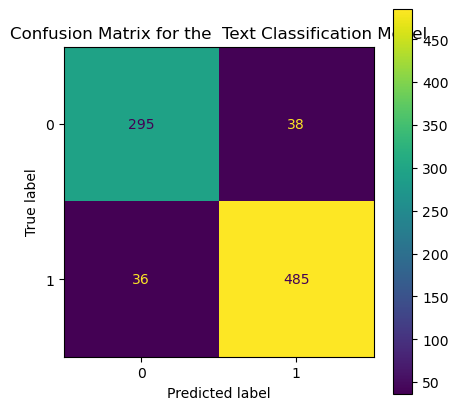

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),y_test)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
class_names = ['0','1']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Text Classification Model')
ax.grid(False)
# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

In [35]:
c=pd.read_csv("cleaned1_loan.csv",index_col=0)
c

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Total_Assets,Assets_score,Assets_to_loan_score,Income_to_loan,Income_to_loan_score,Income_to_Loan_score_per_dependancy
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,42700000,33220600000,1111.056856,3.852843,2997.511706,999.170569
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,13700000,5712900000,468.270492,2.688525,1121.114754,1121.114754
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,44900000,22719400000,764.962963,6.127946,3100.740741,775.185185
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,44800000,20921600000,681.485342,2.136808,997.889251,249.472313
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,50000000,19100000000,789.256198,8.099174,3093.884298,515.647383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,0,6600000,2092200000,909.652174,5.217391,1653.913043,275.652174
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,18100000,10117900000,895.389381,5.840708,3264.955752,3264.955752
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,31700000,14486900000,606.146444,4.895397,2237.196653,745.732218
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,23000000,17940000000,1401.562500,2.562500,1998.750000,999.375000


In [36]:
y_test.shape

(854,)

In [37]:
predict_target.shape


(854,)